# Generate states and labels:

In [1]:
# Import libraries
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt 

In [2]:
# Generate states as 2 random numbers between -1 and 1
p = 500
states_set1=np.random.rand(p,2)*2-1
print(states_set1)
# Let boundary be defined as n.(x,y) + c = 0
n = (np.array([ 0.5 , 0.5]),np.array([ 0.5 , 0.5]))
c = (0.2,-0.2)

# Introduce some noise
noise_rate = 0

# Assign labels
labels_set1=np.ones((p, 1))*(np.float64(-1))

for mu, state in enumerate(states_set1):
    # if the state obeys the condition, set label to 1, or with a 10% probability to -1 
    if (np.dot(n[0],state) + c[0] > 0 and np.dot(n[1],state) + c[1] < 0) or np.random.rand() < noise_rate:
        labels_set1[mu][0] = np.float64(1)       
print(labels_set1)


[[ 0.59003733  0.58252193]
 [-0.23583836 -0.17768748]
 [-0.30537918  0.75033886]
 [ 0.1997424  -0.17602031]
 [ 0.33209247 -0.97103559]
 [-0.84721293 -0.86227116]
 [ 0.14995214  0.68406055]
 [ 0.07693709 -0.19970916]
 [ 0.36512317  0.47677288]
 [-0.87580145  0.30111957]
 [-0.26555608  0.8672277 ]
 [-0.90207792 -0.5043812 ]
 [-0.8158513   0.60104591]
 [ 0.98835903  0.67246275]
 [ 0.53543387  0.20070708]
 [ 0.15521716 -0.76073953]
 [-0.97372563 -0.43104882]
 [-0.46346574  0.185035  ]
 [-0.13482551 -0.45751766]
 [-0.03189934 -0.65710239]
 [-0.15574419 -0.24631736]
 [-0.89206481  0.86518653]
 [-0.98811551  0.22476748]
 [ 0.75799865 -0.49771261]
 [ 0.02824706  0.20703513]
 [-0.16760242 -0.71350792]
 [ 0.92851615  0.20716551]
 [-0.66539771 -0.99934696]
 [ 0.03432046  0.41231831]
 [ 0.83112888 -0.93428645]
 [-0.09270815 -0.9820639 ]
 [ 0.34840215 -0.71809978]
 [ 0.50941985 -0.95421275]
 [-0.28654682  0.04276596]
 [-0.01491473  0.87884494]
 [-0.08072453 -0.79790686]
 [-0.22871538  0.00298722]
 

# Show data generated:

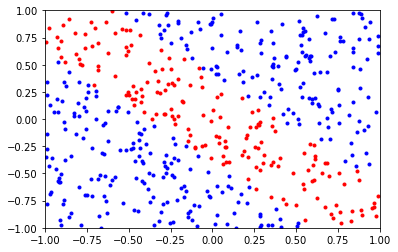

In [3]:
# Plot, let red refer to the +1 label and blue to -1 
for mu in range(p):
    if labels_set1[mu] == 1 :
        plt.plot(states_set1[mu,0],states_set1[mu,1],'r.')
    else :
        plt.plot(states_set1[mu,0],states_set1[mu,1],'b.')
    
plt.axis([-1, 1, -1, 1])
plt.show()

# Network with one layer and two neurons: 

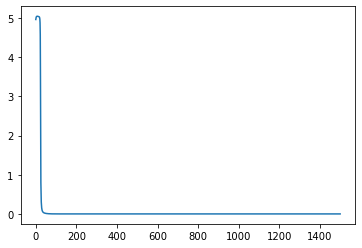

In [5]:
import numpy as np
import copy as cp
from sklearn.utils import shuffle

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def g(x):
    return np.tanh(x)

def g_prim(x) : 
    return np.cosh(x)**(-2)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.normal(0, 0.5, size=(self.input.shape[1], 2)) 
        self.weights2   = np.random.normal(0, 0.5, size=(2, 1))     
        self.biases1    = np.zeros((2, 1)) 
        self.biases2    = np.zeros((1, 1))     
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1_pre = np.dot(self.input, self.weights1) - self.biases1.T
        self.layer1 = g(self.layer1_pre)
        
        self.output_pre =np.dot(self.layer1, self.weights2) - self.biases2.T
        self.output = g(self.output_pre)

    def backprop(self):
        error = (self.y - self.output)
        delta_output = error * g_prim(self.output_pre)
        
        error_hidden_layer = np.dot(delta_output, self.weights2.T)
        delta_hidden_layer = error_hidden_layer * g_prim(self.layer1_pre)
        
        d_weights2 = np.dot(self.layer1.T, (delta_output))
        d_weights1 = np.dot(self.input.T,  delta_hidden_layer)

        
        self.weights1 += d_weights1 * learning_rate / chunk_size
        self.weights2 += d_weights2 * learning_rate / chunk_size
        
        
        self.biases1 += np.sum(delta_hidden_layer, axis=0, keepdims=True).T * -learning_rate / chunk_size
        self.biases2 += np.sum(delta_output, axis=0, keepdims=True) * -learning_rate / chunk_size
        
        #loss
        H = np.square((error)) /2
        self.loss = np.sum(H, axis=0, keepdims=True)



#X = np.array([[0,0],
#              [0,1],
#              [1,0],
#              [1,1]])
#y = np.array([[0],[1],[1],[0]])
#p=4

X = cp.deepcopy(states_set1)
y = np.array(cp.deepcopy(labels_set1))
p = 500
chunk_size = 10

nn = NeuralNetwork(X,y)
learning_rate = 0.3

Htots = []
epochs = 1500
for i in range(epochs):
    
    #shuffler = np.random.permutation(len(X))
    #new_states = X[shuffler]
    #new_labels = y[shuffler]
    
    #Shuffle arrays
    new_states, new_labels = shuffle(X, y)
    
    #Split into mini batches
    new_states = list(chunks(X, chunk_size))
    new_labels = list(chunks(y, chunk_size))
    
    #Backprop each chunk
    for i in range( int(p / chunk_size) ):
        nn.input = new_states[i]
        nn.y = new_labels[i]
        nn.feedforward()
        nn.backprop()
    
    #save loss
    Htots.append(nn.loss[0][0])

#Feed forward original dataset
chunk_size = p
nn.input = states_set1
nn.y = np.array(labels_set1)
nn.feedforward()

#Plot loss as a function of error
plt.plot(range(epochs), Htots)

# Show predicted mapping:

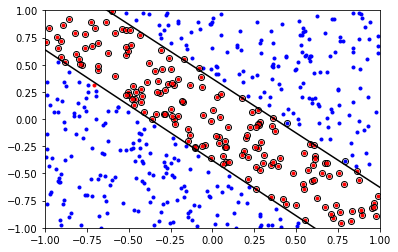

Accuracy : 0.994


In [6]:

h_Out = nn.output  #transpose for proper matrix multiplication
Out = np.zeros(h_Out.shape)  #output label
Accuracy=1

for mu, out in enumerate(h_Out):
    if out > 0 : 
        Out[mu] = 1
    else :
        Out[mu] = -1 
    if Out[mu] != labels_set1[mu] :
        Accuracy -= 1/p
        
# ============ Plot =========
for mu in range(p):
    if labels_set1[mu] == 1 :
        plt.plot(states_set1[mu,0],states_set1[mu,1],'r.')
    else :
        plt.plot(states_set1[mu,0],states_set1[mu,1],'b.')
    # plot classification of network as circles     
    if Out[mu] == 1 :
        plt.plot(states_set1[mu,0],states_set1[mu,1],'ko',mfc='none')
    
# Plot the decision bondary of the network
x1_span = np.linspace(-1,1,100)

x2_span = (-nn.weights1[0][0]*x1_span + nn.biases1[0] ) / nn.weights1[1][0]

x3_span = (-nn.weights1[0][1]*x1_span + nn.biases1[1] ) / nn.weights1[1][1]

plt.plot(x1_span,x2_span,'k')
plt.plot(x1_span,x3_span,'k')


plt.axis([-1, 1, -1, 1])
plt.show()
# ============ end Plot =========
print("Accuracy : " + str(Accuracy) )
#print("Loss : " + str(Htot) )

# DATASET 2

In [7]:
# Generate states as 2 random numbers between -1 and 1
p = 500
states_set2=np.random.rand(p,2)*2-1

# Introduce some noise if you like
noise_rate = 0

# Assign labels
labels_set2=np.ones((p, 1))*(np.float64(-1))

for mu, state in enumerate(states_set2):
    # if the state obeys the condition, set label to 1, or with a 10% probability to -1 
    if state[0] * state[1] > 0 or np.random.rand() < noise_rate:
        labels_set2[mu][0] = np.float64(1)


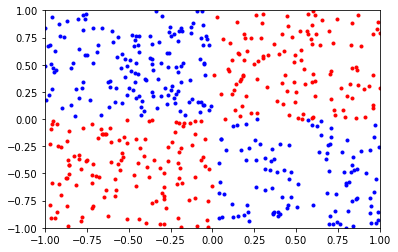

In [8]:
# Plot, let red refer to the +1 label and blue to -1 
for mu in range(p):
    if labels_set2[mu] == 1 :
        plt.plot(states_set2[mu,0],states_set2[mu,1],'r.')
    else :
        plt.plot(states_set2[mu,0],states_set2[mu,1],'b.')
    
plt.axis([-1, 1, -1, 1])
plt.show()

In [ ]:
# Network with two layer and three neurons each: 

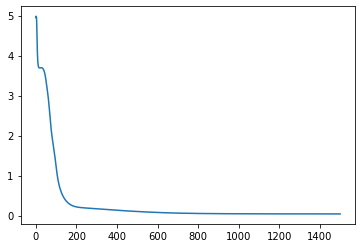

In [9]:
import numpy as np

def g(x):
    return np.tanh(x)

def g_prim(x) : 
    return np.cosh(x)**(-2)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights0   = np.random.normal(0, 0.5, size=(self.input.shape[1], 3)) 
        self.weights1   = np.random.normal(0, 0.5, size=(self.weights0.shape[1], 3)) 
        self.weights2   = np.random.normal(0, 0.5, size=(3, 1))
        self.biases0    = np.zeros((3, 1)) 
        self.biases1    = np.zeros((3, 1)) 
        self.biases2    = np.zeros((1, 1))     
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer0_pre = np.dot(self.input, self.weights0) - self.biases0.T
        self.layer0 = g(self.layer0_pre)
        
        self.layer1_pre = np.dot(self.layer0, self.weights1) - self.biases1.T
        self.layer1 = g(self.layer1_pre)
        
        self.output_pre =np.dot(self.layer1, self.weights2) - self.biases2.T
        self.output = g(self.output_pre)

    def backprop(self):
        error = (self.y - self.output)
        delta_output = error * g_prim(self.output_pre)
        
        error_hidden_layer1 = np.dot(delta_output, self.weights2.T)
        delta_hidden_layer1 = error_hidden_layer1 * g_prim(self.layer1_pre)
        
        error_hidden_layer0 = np.dot(delta_hidden_layer1, self.weights1.T)
        delta_hidden_layer0 = error_hidden_layer0 * g_prim(self.layer0_pre)
        
        d_weights2 = np.dot(self.layer1.T, (delta_output))
        d_weights1 = np.dot(self.layer0.T,  delta_hidden_layer1)
        d_weights0 = np.dot(self.input.T,  delta_hidden_layer0)

        self.weights0 += d_weights0 * learning_rate / chunk_size
        self.weights1 += d_weights1 * learning_rate / chunk_size
        self.weights2 += d_weights2 * learning_rate / chunk_size
        
        self.biases0 += np.sum(delta_hidden_layer0, axis=0, keepdims=True).T * -learning_rate / chunk_size
        self.biases1 += np.sum(delta_hidden_layer1, axis=0, keepdims=True).T * -learning_rate / chunk_size
        self.biases2 += np.sum(delta_output, axis=0, keepdims=True).T * -learning_rate / chunk_size
        
        #loss
        H = np.square((error)) /2
        self.loss = np.sum(H, axis=0, keepdims=True)


#X = np.array([[0,0],
#              [0,1],
#              [1,0],
#              [1,1]])
#y = np.array([[0],[1],[1],[0]])
#p=4

X = cp.deepcopy(states_set2)
y = np.array(cp.deepcopy(labels_set2))
p = 500
chunk_size = 10

nn1 = NeuralNetwork(X,y)
learning_rate = 0.05

Htots = []
epochs = 1500
for i in range(epochs):
             
    #Shuffle arrays
    new_states, new_labels = shuffle(X, y)
    
    #Split into mini batches
    new_states = list(chunks(X, chunk_size))
    new_labels = list(chunks(y, chunk_size))
    
    #
    for i in range( int(p / chunk_size) ):
        nn1.input = new_states[i]
        nn1.y = new_labels[i]
        nn1.feedforward()
        nn1.backprop()
    
    #save loss
    Htots.append(nn1.loss[0][0])

chunk_size = p
nn1.input = states_set2
nn1.y = np.array(labels_set2)
nn1.feedforward()
             
#Plot loss as a function of error
plt.plot(range(epochs), Htots)



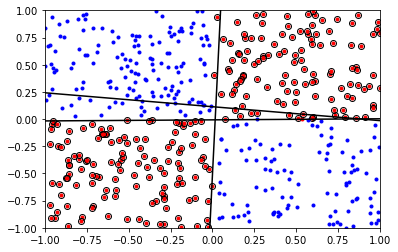

Accuracy : 0.998


In [14]:

h_Out = nn1.output  #transpose for proper matrix multiplication
Out = np.zeros(h_Out.shape)  #output label
Accuracy=1

for mu, out in enumerate(h_Out):
    if out > 0 : 
        Out[mu] = 1
    else :
        Out[mu] = -1 
    if Out[mu] != labels_set2[mu] :
        Accuracy -= 1/p
        
# ============ Plot =========
for mu in range(p):
    if labels_set2[mu] == 1 :
        plt.plot(states_set2[mu,0],states_set2[mu,1],'r.')
    else :
        plt.plot(states_set2[mu,0],states_set2[mu,1],'b.')
    # plot classification of network as circles     
    if Out[mu] == 1 :
        plt.plot(states_set2[mu,0],states_set2[mu,1],'ko',mfc='none')
    
# Plot the decision bondary of the network
x1_span = np.linspace(-1,1,100)

x2_span = (-nn1.weights0[0][0]*x1_span + nn1.biases0[0] ) / nn1.weights0[1][0]
x3_span = (-nn1.weights0[0][1]*x1_span + nn1.biases0[1] ) / nn1.weights0[1][1]
x4_span = (-nn1.weights0[0][2]*x1_span + nn1.biases0[2] ) / nn1.weights0[1][2]

plt.plot(x1_span,x2_span,'k')
plt.plot(x1_span,x3_span,'k')
plt.plot(x1_span,x4_span,'k')
    
plt.axis([-1, 1, -1, 1])
plt.show()
# ============ end Plot =========
print("Accuracy : " + str(Accuracy) )
#print("Loss : " + str(Htot) )